# **Exploratory Data Analysis for Loan Approval Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 1. How does annual income differ between approved and rejected loans?


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

### You can see the spaces on behind most of the feature names, so let's take care of that.

In [9]:
# Remove leading/trailing spaces from column names

df.columns = df.columns.str.strip()

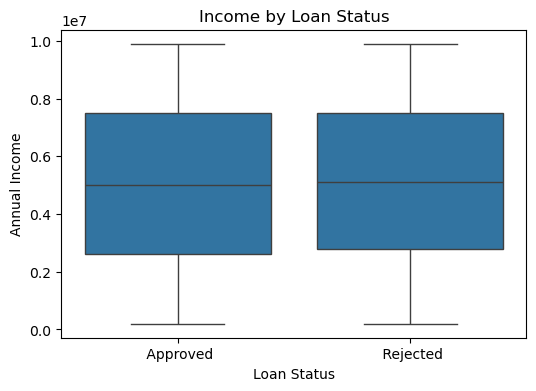

In [10]:
# Boxplot of income_by loan_status
plt.figure(figsize=(6,4))
sns.boxplot(x="loan_status", y="income_annum", data=df)
plt.title("Income by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()

In [11]:
# Summary statistics
df.groupby("loan_status")["income_annum"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Approved,2656.0,5.025904e+06,2.827228e+06,200000.0,2600000.0,5000000.0,7500000.0,9900000.0
Rejected,1613.0,5.113825e+06,2.772946e+06,200000.0,2800000.0,5100000.0,7500000.0,9900000.0


**Note:** Compare medians and IQR to see if approved applicants earn more.

---

## 2. Debt‑to‑Income Ratio: loan_amount / income_annum by status

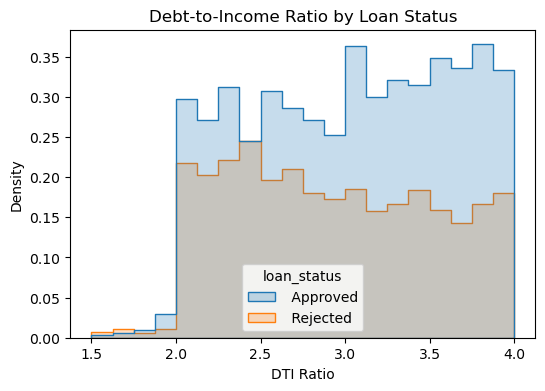

In [13]:
df["dti_ratio"] = df["loan_amount"] / df["income_annum"]

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="dti_ratio", hue="loan_status", element="step", stat="density")
plt.title("Debt-to-Income Ratio by Loan Status")
plt.xlabel("DTI Ratio")
plt.show()

In [14]:
df.groupby("loan_status")["dti_ratio"].mean()

loan_status
Approved    3.025512
Rejected    2.917779
Name: dti_ratio, dtype: float64

**Note:** Higher DTI may correlate with rejection.

---

## 3. Dependents Impact: dependents vs approval rate

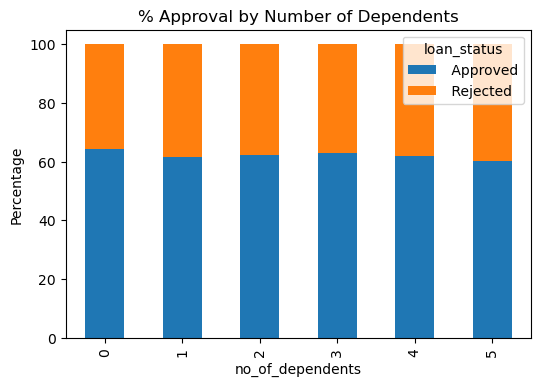

In [15]:
dep_ct = pd.crosstab(df["no_of_dependents"], df["loan_status"], normalize="index") * 100
dep_ct.plot(kind="bar", stacked=True, figsize=(6,4))
plt.title("% Approval by Number of Dependents")
plt.ylabel("Percentage")
plt.show()

**Note:** See if more dependents means lower approval %.

---

## 4. CIBIL Score vs Approval: is there a clear cutoff?

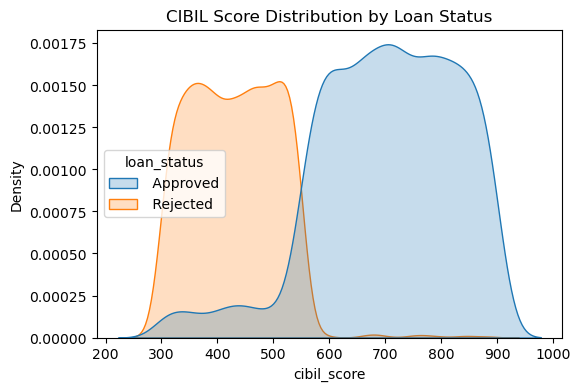

In [16]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="cibil_score", hue="loan_status", fill=True)
plt.title("CIBIL Score Distribution by Loan Status")
plt.show()

In [17]:
# approximate cutoff
print("Mean CIBIL by status:\n", df.groupby("loan_status")["cibil_score"].mean())

Mean CIBIL by status:
 loan_status
Approved    703.461973
Rejected    429.468072
Name: cibil_score, dtype: float64


## 5. Self‑Employed vs Salaried Approval Rates


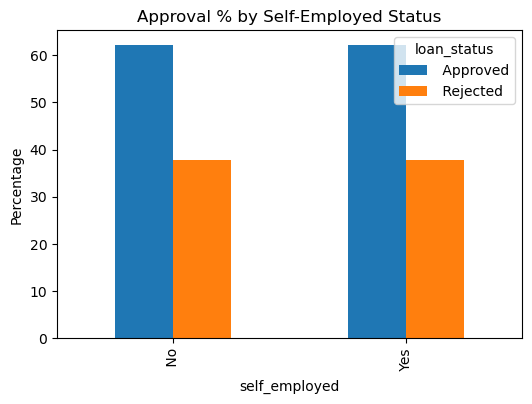

In [18]:
se_ct = pd.crosstab(df["self_employed"], df["loan_status"], normalize="index") * 100
se_ct.plot(kind="bar", figsize=(6,4))
plt.title("Approval % by Self-Employed Status")
plt.ylabel("Percentage")
plt.show()

## 6. Education Effect: Graduate vs Not Graduate


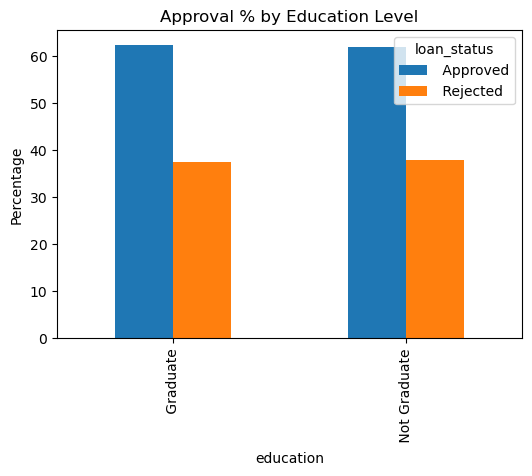

In [19]:
edu_ct = pd.crosstab(df["education"], df["loan_status"], normalize="index") * 100
edu_ct.plot(kind="bar", figsize=(6,4))
plt.title("Approval % by Education Level")
plt.ylabel("Percentage")
plt.show()